# Preprocesamiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
dataset = pd.read_csv('cybersecurity_intrusion_data.csv')

In [ ]:
dataset.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
dataset['encryption_used'] = dataset['encryption_used'].fillna('Unknown')
data=dataset.drop(["session_id"],axis=1)

In [ ]:
data_encoded = pd.get_dummies(data, columns=['browser_type','encryption_used', 'protocol_type'])
data_encoded.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,encryption_used_AES,encryption_used_DES,encryption_used_Unknown,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP
0,599,4,492.983263,0.606818,1,0,1,False,True,False,False,False,False,True,False,False,True,False
1,472,3,1557.996461,0.301569,0,0,0,False,False,True,False,False,False,True,False,False,True,False
2,629,3,75.044262,0.739164,2,0,1,True,False,False,False,False,False,True,False,False,True,False
3,804,4,601.248835,0.123267,0,0,1,False,False,False,False,True,False,True,False,False,False,True
4,453,5,532.540888,0.054874,1,0,0,False,False,True,False,False,True,False,False,False,True,False


# Modelo

In [ ]:
x=data_encoded.drop(["attack_detected"],axis=1)
y=data_encoded["attack_detected"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Mirar mejor n de knn

Mejor k: 7


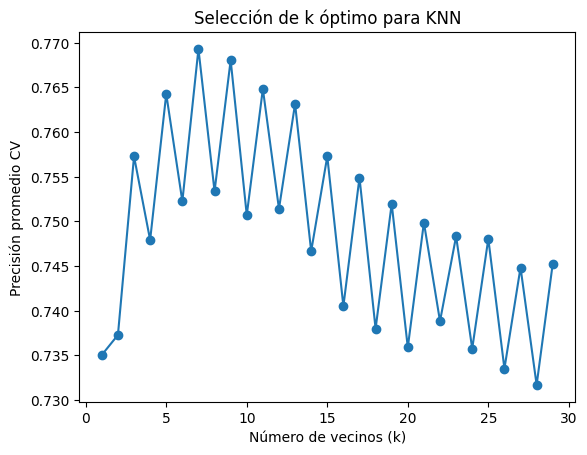

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# X_scaled: features ya escaladas
# y: etiquetas
k_values = range(1, 30)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Encontrar el k con mayor precisión
best_k = k_values[np.argmax(cv_scores)]
print("Mejor k:", best_k)

# Graficar
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión promedio CV')
plt.title('Selección de k óptimo para KNN')
plt.show()

## Varios modelos

In [ ]:
models={
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "Gradiant Boosting Classifier":GradientBoostingClassifier(),
    "Naive Bayes Classifier":GaussianNB(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=7)
}

In [ ]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall':[]
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    metrics['Precision'].append(precision * 100)
    metrics['Recall'].append(recall * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print(f"Precision: {precision*100}")
    print(f"F1 Score: {f1*100}")
    print(f"Recall: {recall*100}")
    print("-" * 30)

Model: Random Forest Classifier
Accuracy: 89.26624737945492
Precision: 99.05548996458087
F1 Score: 86.76318510858326
Recall: 77.18491260349586
------------------------------
Model: Decision Tree Classifier
Accuracy: 81.80293501048219
Precision: 78.97071872227151
F1 Score: 80.39747064137308
Recall: 81.87672493100277
------------------------------
Model: Ada Boost Classifier
Accuracy: 86.70859538784067
Precision: 100.0
F1 Score: 82.92945611200861
Recall: 70.83716651333947
------------------------------
Model: Logistic Regression
Accuracy: 74.84276729559748
Precision: 75.76719576719577
F1 Score: 70.47244094488188
Recall: 65.86936522539098
------------------------------
Model: Gradiant Boosting Classifier
Accuracy: 89.35010482180293
Precision: 100.0
F1 Score: 86.77083333333333
Recall: 76.6329346826127
------------------------------
Model: Naive Bayes Classifier
Accuracy: 82.26415094339623
Precision: 90.09661835748793
F1 Score: 77.911227154047
Recall: 68.62925482980681
---------------------

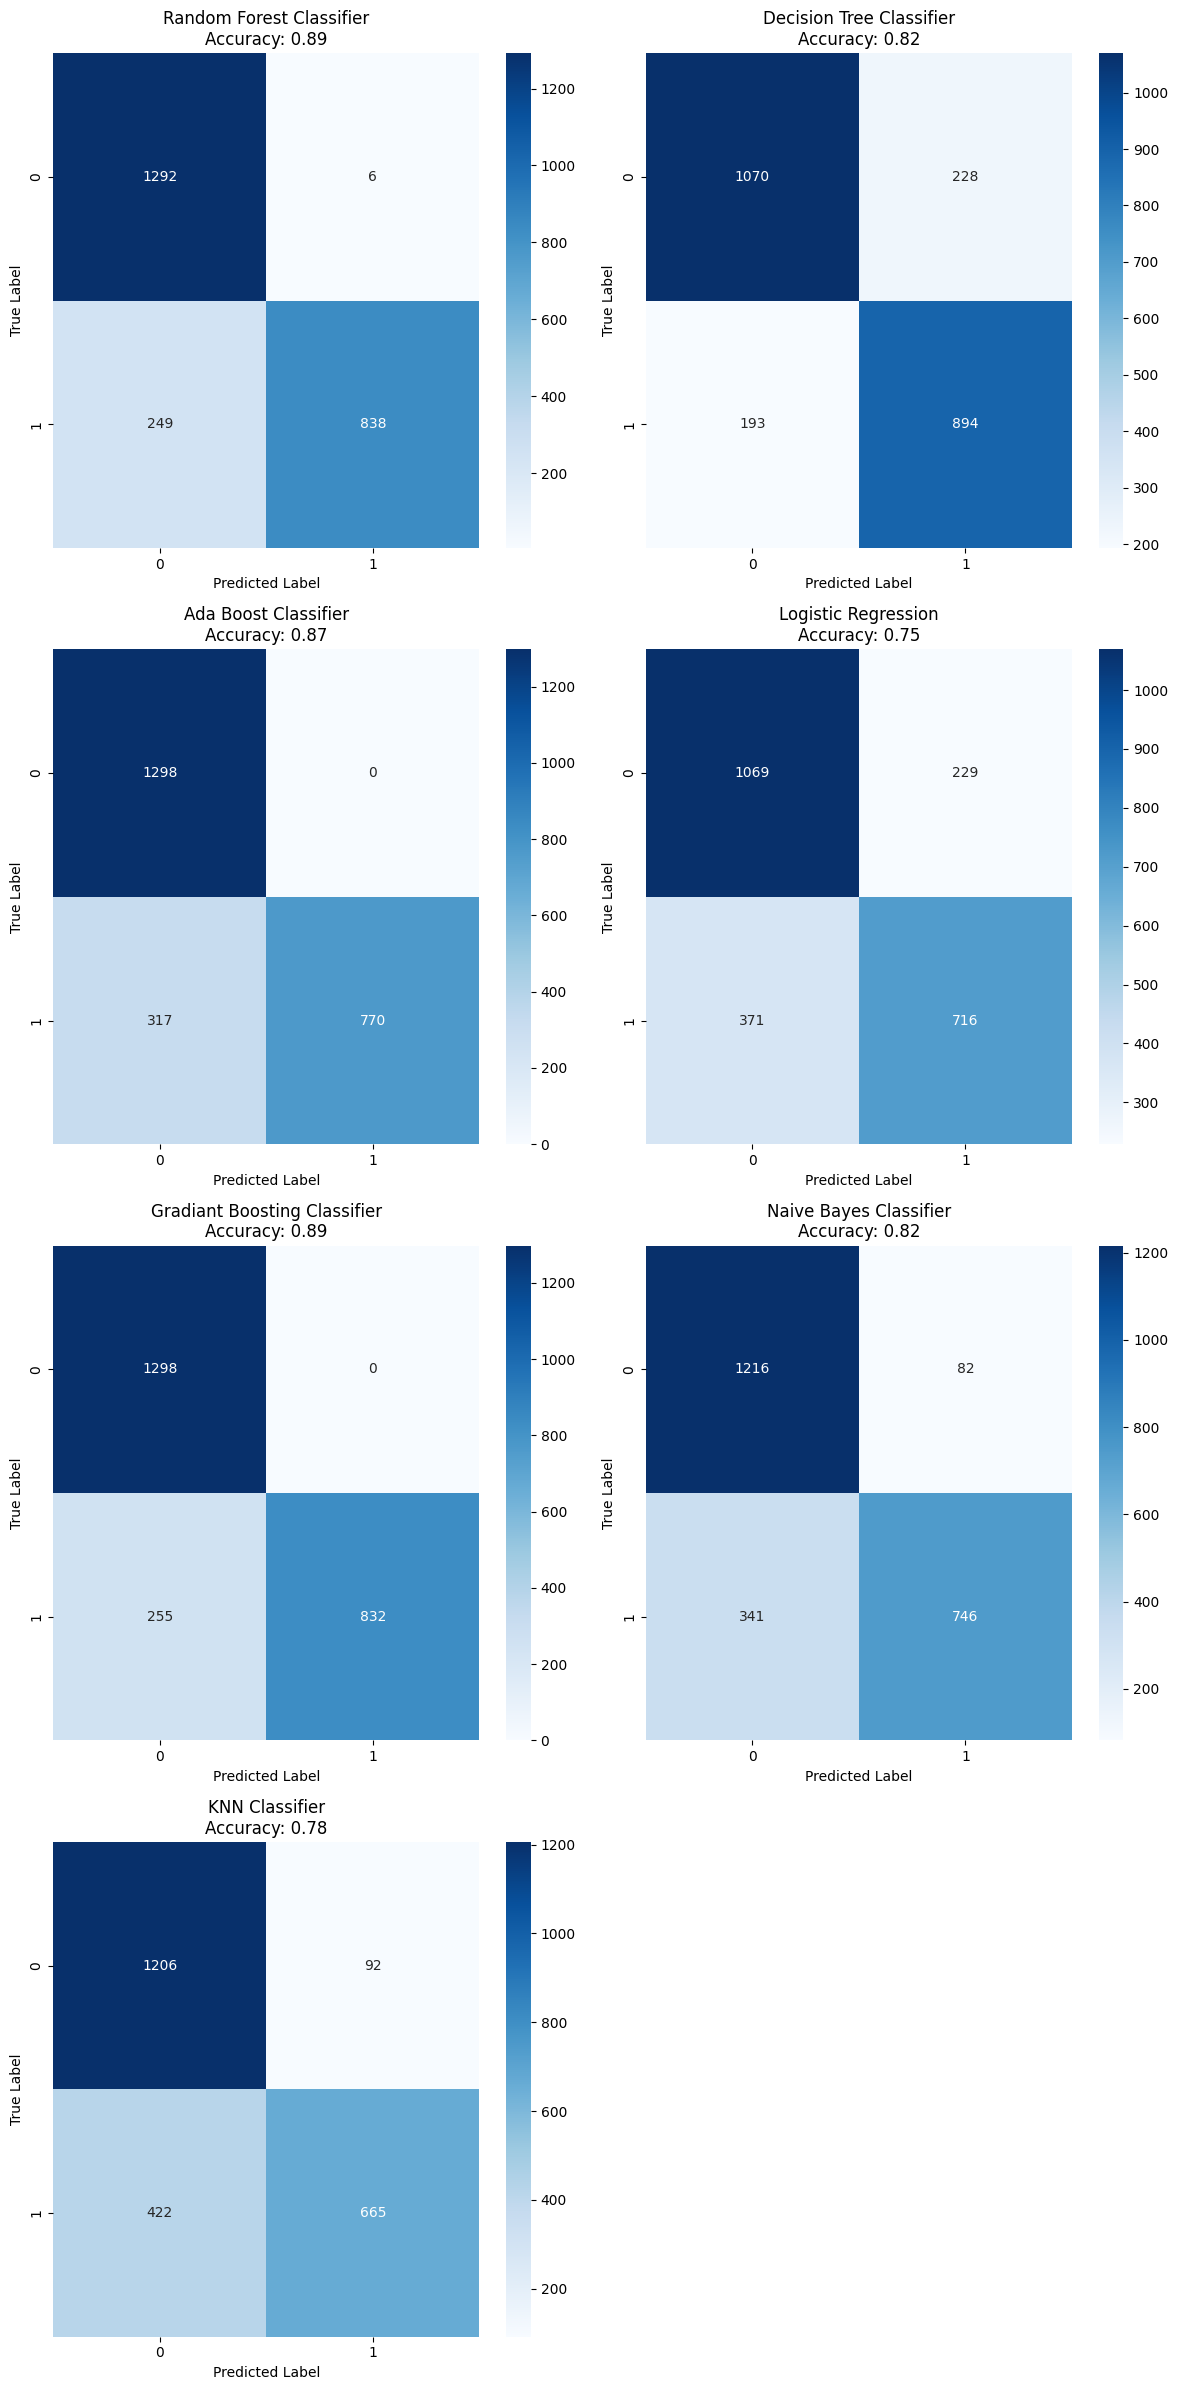

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Número de modelos
n_models = len(models)
# Calcular filas y columnas para subplots (aproximadamente cuadrado)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))

# Aplanar el arreglo de ejes para recorrerlo fácilmente
axes = axes.flatten()

for i, (name, clf) in enumerate(models.items()):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test),
                ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {accuracy:.2f}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Si hay subplots vacíos, los eliminamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Red Neuronal

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=32)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6028 - loss: 0.6622 - val_accuracy: 0.7556 - val_loss: 0.5174
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7305 - loss: 0.5456 - val_accuracy: 0.7774 - val_loss: 0.4825
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7594 - loss: 0.5093 - val_accuracy: 0.8147 - val_loss: 0.4391
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4618 - val_accuracy: 0.8428 - val_loss: 0.4000
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8252 - loss: 0.4237 - val_accuracy: 0.8675 - val_loss: 0.3723
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.4080 - val_accuracy: 0.8683 - val_loss: 0.3563
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3856 - val_accuracy: 0.8746 - val_loss: 0.3440
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8437 - loss: 0.3838 - val_accuracy: 0.8813 - val_

In [ ]:
# Evaluar en test
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Predicciones
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Umbral 0.5 para clasificación binaria

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

nn_metrics = {
    'Model': 'Neural Network',
    'Accuracy': accuracy_score(y_test, y_pred) * 100,
    'Precision': precision_score(y_test, y_pred) * 100,
    'Recall': recall_score(y_test, y_pred) * 100
}

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8935 - loss: 0.2894
Test Accuracy: 89.22%
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1289    9]
 [ 248  839]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1298
           1       0.99      0.77      0.87      1087

    accuracy                           0.89      2385
   macro avg       0.91      0.88      0.89      2385
weighted avg       0.91      0.89      0.89      2385



In [ ]:
# Guardar todo el modelo
model.save('modelo.h5')
model.save_weights('pesos_modelo.weights.h5')

# Cargar el modelo completo después
from tensorflow.keras.models import load_model
loaded_model = load_model('modelo.h5')

## Metricas

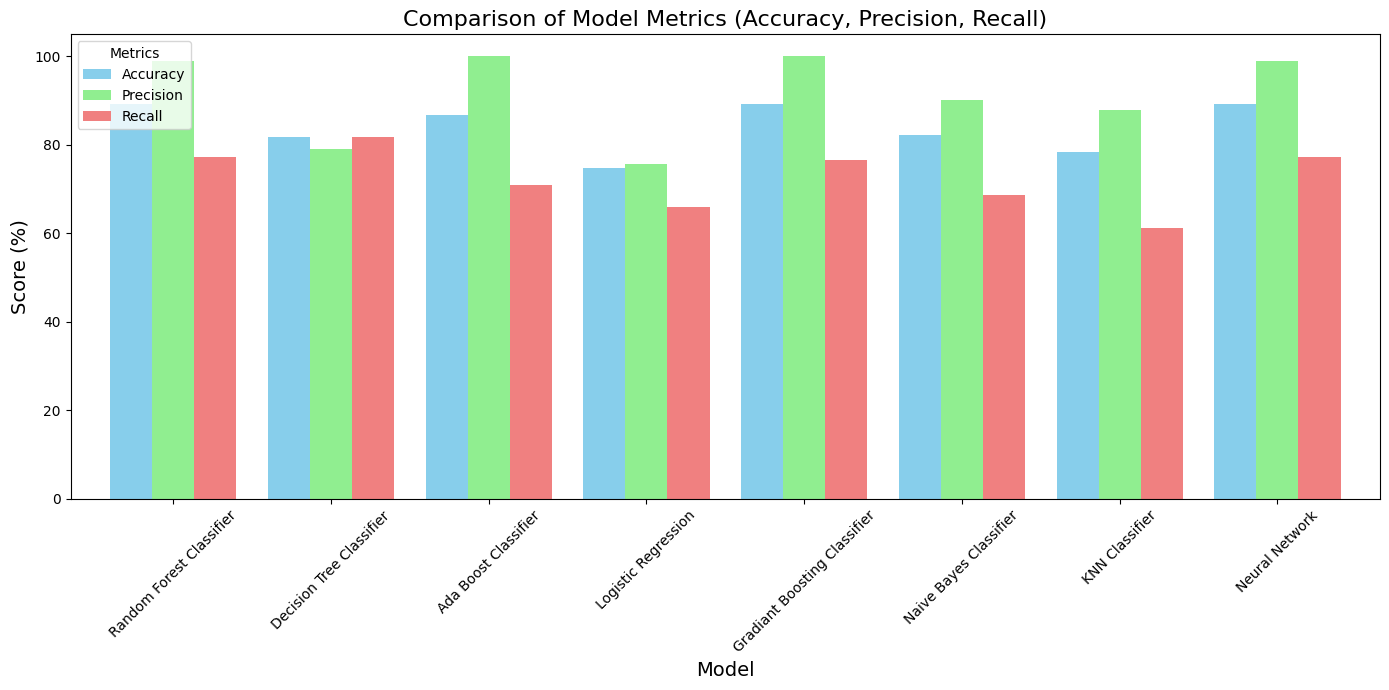

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert nn_metrics to a DataFrame and concatenate
nn_metrics_df = pd.DataFrame([nn_metrics])
metrics_df = pd.concat([metrics_df, nn_metrics_df], ignore_index=True)

# Crear DataFrame y graficar
import matplotlib.pyplot as plt

metrics_df.set_index('Model').plot(kind='bar', width=0.8, figsize=(14, 7),
                                   color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Model Metrics (Accuracy, Precision, Recall)', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall
0,Random Forest Classifier,89.266247,99.055490,77.184913
1,Decision Tree Classifier,81.802935,78.970719,81.876725
2,Ada Boost Classifier,86.708595,100.000000,70.837167
3,Logistic Regression,74.842767,75.767196,65.869365
4,Gradiant Boosting Classifier,89.350105,100.000000,76.632935
5,Naive Bayes Classifier,82.264151,90.096618,68.629255
6,KNN Classifier,78.448637,87.846764,61.177553
7,Neural Network,89.224319,98.938679,77.184913


---

# Pipeline Modelo

In [ ]:
# train_pipeline.py
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# ---------------------------------------------------
# 1. LOAD DATA
# ---------------------------------------------------
df = pd.read_csv("cybersecurity_intrusion_data.csv")

# Fix missing categorical values
df["encryption_used"] = df["encryption_used"].fillna("Unknown")

# Drop session_id (irrelevant for ML)
df = df.drop("session_id", axis=1)

# Target & features
X = df.drop("attack_detected", axis=1)
y = df["attack_detected"]


# ---------------------------------------------------
# 2. DEFINE CATEGORICAL & NUMERIC COLUMNS
# ---------------------------------------------------
categorical_cols = ["protocol_type", "encryption_used", "browser_type"]

numeric_cols = [
    "network_packet_size",
    "login_attempts",
    "session_duration",
    "ip_reputation_score",
    "failed_logins",
    "unusual_time_access"
]


# ---------------------------------------------------
# 3. PREPROCESSOR
# ---------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)


# ---------------------------------------------------
# 4. PIPELINE (PREPROCESS + MODEL)
# ---------------------------------------------------
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier())
])


# ---------------------------------------------------
# 5. TRAIN / TEST SPLIT
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# ---------------------------------------------------
# 6. TRAIN
# ---------------------------------------------------
pipeline.fit(X_train, y_train)


# ---------------------------------------------------
# 7. EVALUATION
# ---------------------------------------------------
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)


# ---------------------------------------------------
# 8. SAVE MODEL
# ---------------------------------------------------
joblib.dump(pipeline, "suspicious_access_classifier.pkl")
print("Modelo guardado como suspicious_access_classifier.pkl")


Accuracy: 89.35010482180293
Precision: 100.0
Recall: 76.6329346826127
Modelo guardado como suspicious_access_classifier.pkl


In [ ]:
# inference_pipeline.py
import pandas as pd
import joblib

def load_model(path="suspicious_access_classifier.pkl"):
    return joblib.load(path)


def predict_new_data(model, data):
    """
    data: dict o DataFrame con columnas EXACTAS:
    - network_packet_size
    - protocol_type
    - login_attempts
    - session_duration
    - encryption_used
    - ip_reputation_score
    - failed_logins
    - browser_type
    - unusual_time_access
    """

    if isinstance(data, dict):
        data = pd.DataFrame([data])

    # predict
    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0][1]

    return {
        "attack_detected": int(pred),
        "probability": float(prob)
    }


# Ejemplo de uso real
if __name__ == "__main__":
    model = load_model()

    sample = {
        "network_packet_size": 1200,
        "protocol_type": "HTTP",
        "login_attempts": 3,
        "session_duration": 15.8,
        "encryption_used": "AES",
        "ip_reputation_score": 73.2,
        "failed_logins": 1,
        "browser_type": "Chrome",
        "unusual_time_access": 0
    }

    result = predict_new_data(model, sample)
    print(result)


{'attack_detected': 1, 'probability': 0.9782519345511509}


---